<a href="https://colab.research.google.com/github/ishan-DA/iNeuron-Internship-Amazon-Sales-Data/blob/main/Amazon_Sales_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **iNeuron Internship**

Submitted by - Ishan Chaurasia

Project Title: Amazon Sales Data Analysis

Technologies: Business Intelligence

Domain: E-commerce

Difficulty Level: Advanced

#### **PROBLEM STATEMENT**

*Sales management has gained importance to meet increasing competition and the need for improved methods of distribution to reduce cost and to increase profits. Sales management today is the most important function in a commercial and business enterprise.*

*Do ETL : Extract-Transform-Load some Amazon dataset and find Sales-trend -> month wise , year wise , yearly_month wise.*

*Find key metrics and factors and show the meaningful relationships between attributes.*

#### **DATA COLLECTION**

Dataset taken from iNeuron Portal Link 👉👉 *https://drive.google.com/drive/folders/1FkmFVL8wlJmQWP1z52TD8PlhOJhitTyI*

In [37]:
# importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [38]:
# importing data

sales = pd.read_csv ('/content/drive/MyDrive/Colab Notebooks/Cleaned Salesdata.csv')
sales.head(10)

,CustKey,Discount Amount,Invoice Date,Item,List Price,Promised Delivery Date,Sales Amount,Sales Amount Based on List Price,Sales Cost Amount,Sales Margin Amount,Sales Price,Sales Quantity,Sales Rep,U/M,Invoice Year,Invoice Month,Invoice Quarter,Invoice Day
0,10000481,-237.910,30-04-2017,Urban Large Eggs,0.000,30-04-2017,237.91,0.000,0.0,237.91,237.910000,1,184,EA,2017,4,2,30
1,10002220,368.790,14-07-2017,Moms Sliced Turkey,824.960,14-07-2017,456.17,824.960,0.0,456.17,456.170000,1,127,EA,2017,7,3,14
2,10002220,109.730,17-10-2017,Cutting Edge Foot-Long Hot Dogs,548.660,16-10-2017,438.93,548.660,0.0,438.93,438.930000,1,127,EA,2017,10,4,17
3,10002489,-211.750,03-06-2017,Kiwi Lox,0.000,03-06-2017,211.75,0.000,0.0,211.75,211.750000,1,160,EA,2017,6,2,3
4,10004516,96627.940,27-05-2017,High Top Sweet Onion,408.520,28-05-2017,89248.66,185876.600,0.0,89248.66,196.150901,455,124,SE,2017,5,2,27
5,10004516,-1950.000,30-05-2017,Best Choice Fudge Brownies,0.000,30-05-2017,1950.00,0.000,0.0,1950.00,1950.000000,1,124,EA,2017,5,2,30
6,10007866,371.014,03-09-2017,Moms Sliced Turkey,795.314,03-09-2017,424.30,795.314,0.0,424.30,424.300000,1,149,EA,2017,9,3,3
7,10009356,608.080,18-06-2017,Tell Tale Garlic,575.000,18-06-2017,541.92,1150.000,0.0,541.92,270.960000,2,103,EA,2017,6,2,18
8,10009356,424.800,18-06-2017,High Top Walnuts,51.880,18-06-2017,353.40,778.200,0.0,353.40,23.560000,15,103,EA,2017,6,2,18
9,10009356,13492.800,18-06-2017,Big Time Frozen Cheese Pizza,412.030,18-06-2017,11229.00,24721.800,0.0,11229.00,187.150000,60,103,EA,2017,6,2,18


In [39]:
# checking the shape

sales.shape

(65280, 18)

Observation: We have a total of 65,280 rows and 18 columns in the dataset.

In [40]:
# columns name

sales.columns

Index(['CustKey', 'Discount Amount', 'Invoice Date', 'Item', 'List Price',
       'Promised Delivery Date', 'Sales Amount',
       'Sales Amount Based on List Price', 'Sales Cost Amount',
       'Sales Margin Amount', 'Sales Price', 'Sales Quantity', 'Sales Rep',
       'U/M', 'Invoice Year', 'Invoice Month', 'Invoice Quarter',
       'Invoice Day'],
      dtype='object')

In [41]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65280 entries, 0 to 65279
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CustKey                           65280 non-null  int64  
 1   Discount Amount                   65280 non-null  float64
 2   Invoice Date                      65280 non-null  object 
 3   Item                              65280 non-null  object 
 4   List Price                        65280 non-null  float64
 5   Promised Delivery Date            65280 non-null  object 
 6   Sales Amount                      65280 non-null  float64
 7   Sales Amount Based on List Price  65280 non-null  float64
 8   Sales Cost Amount                 65280 non-null  float64
 9   Sales Margin Amount               65280 non-null  float64
 10  Sales Price                       65280 non-null  float64
 11  Sales Quantity                    65280 non-null  int64  
 12  Sale

Observation: The names and the datatypes of the columns in the dataset.

In [42]:
# checking for any missing values

sales.isnull().sum()

CustKey                             0
Discount Amount                     0
Invoice Date                        0
Item                                0
List Price                          0
Promised Delivery Date              0
Sales Amount                        0
Sales Amount Based on List Price    0
Sales Cost Amount                   0
Sales Margin Amount                 0
Sales Price                         0
Sales Quantity                      0
Sales Rep                           0
U/M                                 0
Invoice Year                        0
Invoice Month                       0
Invoice Quarter                     0
Invoice Day                         0
dtype: int64

Observation: There is no missing values in the dataset.

<Axes: >

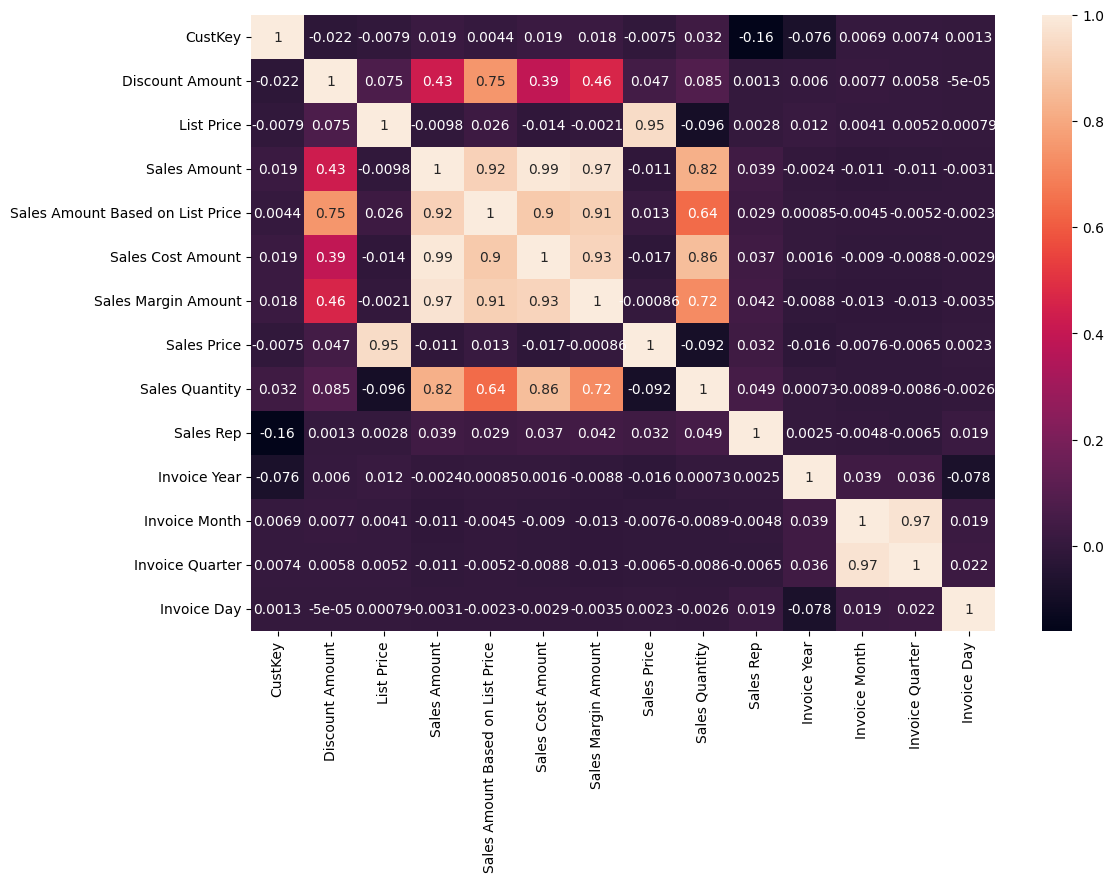

In [43]:
# checking the correlation

plt.figure(figsize=(12,8))
sns.heatmap(sales.corr(), annot=True)

Observation:

*   Discount Amount is highly related to Sales Amount, Sales Cost Amount, Sales Amount based on List Price & Sales Margin Amount and moderately related to Sales Quantity.

*   List Price highly related to sales price and has no relations with Sales amount, Sales cost amount, Sales amount based on list price & sales margin amount.

*   Sales quantity is moderately related to Sales amount, discount amount, sales margin amount.

*   Their is no relation Between Sales Rep and Sales Amount, Sales Margin Amount.

In [44]:
sales.Item.value_counts()

Better Fancy Canned Sardines    1648
Ebony Prepared Salad            1471
Moms Sliced Turkey              1192
Imagine Popsicles               1191
Discover Manicotti              1126
                                ... 
Fast Salted Pretzels               1
Great Bagels                       1
Imagine Frozen Cauliflower         1
Jeffers Corn Puffs                 1
Bravo Fancy Canned Sardines        1
Name: Item, Length: 657, dtype: int64

Observation: Highest number of sold Item is **Better Fancy Canned Sardines**.


Top 5 Selling Items:
*   Better Fancy Canned Sardines
*   Ebony Prepared Salad
*   Moms Sliced Turkey
*   Imagine Popsicles
*   Discover Manicotti

In [45]:
sales.describe()

,CustKey,Discount Amount,List Price,Sales Amount,Sales Amount Based on List Price,Sales Cost Amount,Sales Margin Amount,Sales Price,Sales Quantity,Sales Rep,Invoice Year,Invoice Month,Invoice Quarter,Invoice Day
count,6.528000e+04,65280.000000,65280.000000,65280.000000,65280.000000,65280.000000,65280.000000,65280.000000,65280.000000,65280.000000,65280.000000,65280.000000,65280.000000,65280.000000
mean,1.001770e+07,1855.574835,514.709149,2852.043002,4707.617837,1661.030116,1191.012887,283.696851,45.085708,137.423192,2017.960907,6.307001,2.414246,16.155898
std,7.176244e+03,9037.140888,449.187029,15164.569043,20696.744425,9556.627220,5860.857507,252.031660,429.668301,26.643926,0.946607,3.563558,1.160954,8.795338
min,1.000045e+07,-255820.800000,0.000000,200.010000,0.000000,0.000000,-3932.930000,0.337341,1.000000,103.000000,2017.000000,1.000000,1.000000,1.000000
25%,1.001272e+07,246.037500,181.560000,308.380000,561.040000,167.790000,129.947500,100.070000,2.000000,113.000000,2017.000000,3.000000,1.000000,9.000000
50%,1.001966e+07,441.760000,325.190000,553.940000,998.160000,304.530000,246.490000,183.758250,3.000000,134.000000,2018.000000,6.000000,2.000000,16.000000
75%,1.002351e+07,999.760000,803.860000,1279.987500,2316.630000,687.400000,579.390000,448.220000,8.000000,160.000000,2019.000000,9.000000,3.000000,24.000000
max,1.002758e+07,343532.660000,2760.700000,555376.000000,632610.160000,366576.000000,188800.000000,6035.000000,16000.000000,185.000000,2019.000000,12.000000,4.000000,31.000000


In [46]:
sales[[ 'List Price','Sales Price','Sales Amount Based on List Price','Sales Amount','Discount Amount']].head(20)


,List Price,Sales Price,Sales Amount Based on List Price,Sales Amount,Discount Amount
0,0.0000,237.910000,0.0000,237.91,-237.9100
1,824.9600,456.170000,824.9600,456.17,368.7900
2,548.6600,438.930000,548.6600,438.93,109.7300
3,0.0000,211.750000,0.0000,211.75,-211.7500
4,408.5200,196.150901,185876.6000,89248.66,96627.9400
5,0.0000,1950.000000,0.0000,1950.00,-1950.0000
6,795.3140,424.300000,795.3140,424.30,371.0140
7,575.0000,270.960000,1150.0000,541.92,608.0800
8,51.8800,23.560000,778.2000,353.40,424.8000
9,412.0300,187.150000,24721.8000,11229.00,13492.8000


Observation:

Discount Amount = (Sales Amount Based on List Price - Sales Amount)

In [47]:
# calculating yearly sales

year_sales = sales[['CustKey', 'Item', 'Invoice Date', 'Invoice Year', 'Invoice Month', 'Sales Quantity', 'Sales Amount Based on List Price', 'Discount Amount',
                    'Sales Amount', 'Sales Margin Amount', 'Sales Cost Amount', 'Sales Rep', 'U/M', 'List Price', 'Sales Price']]

,Invoice Year,Sales Amount
0,2017,87457304.54
1,2018,20817471.00
2,2019,77906591.65


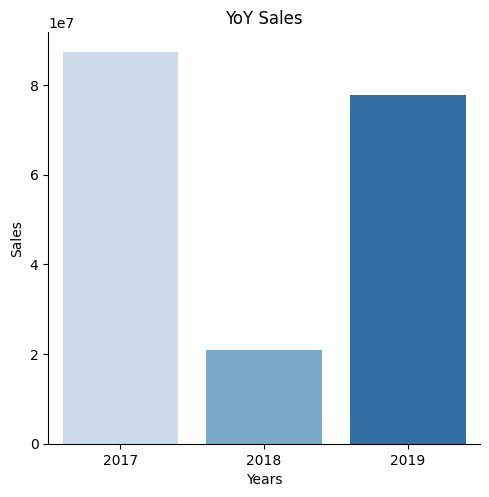

In [48]:
# plotting bar charts on yearly sales

yearly_sales = year_sales.groupby('Invoice Year').sum().reset_index()
sns.catplot(y = 'Sales Amount', x = 'Invoice Year', data = yearly_sales, palette = 'Blues', kind = "bar")
plt.xlabel('Years')
plt.ylabel('Sales')
plt.title('YoY Sales')
yearly_sales[['Invoice Year', 'Sales Amount']]

<Axes: xlabel='Invoice Month', ylabel='Sales Amount'>

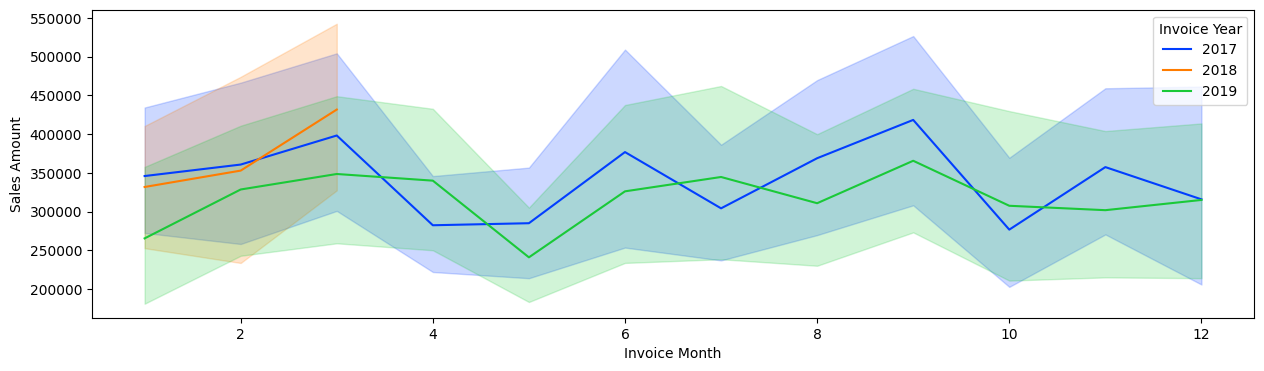

In [49]:
# plotting a line chart to show yealy sales

plt.figure(figsize = (15,4))
sns.lineplot(y ='Sales Amount', x = 'Invoice Month', data = sales.groupby(['Invoice Date','Invoice Year','Invoice Month']).sum(),
             hue = 'Invoice Year', palette='bright')

Obseravtion:

From this plot, it is clear that Sales dipped continuously & then it started to gain from 2018 to 2019.

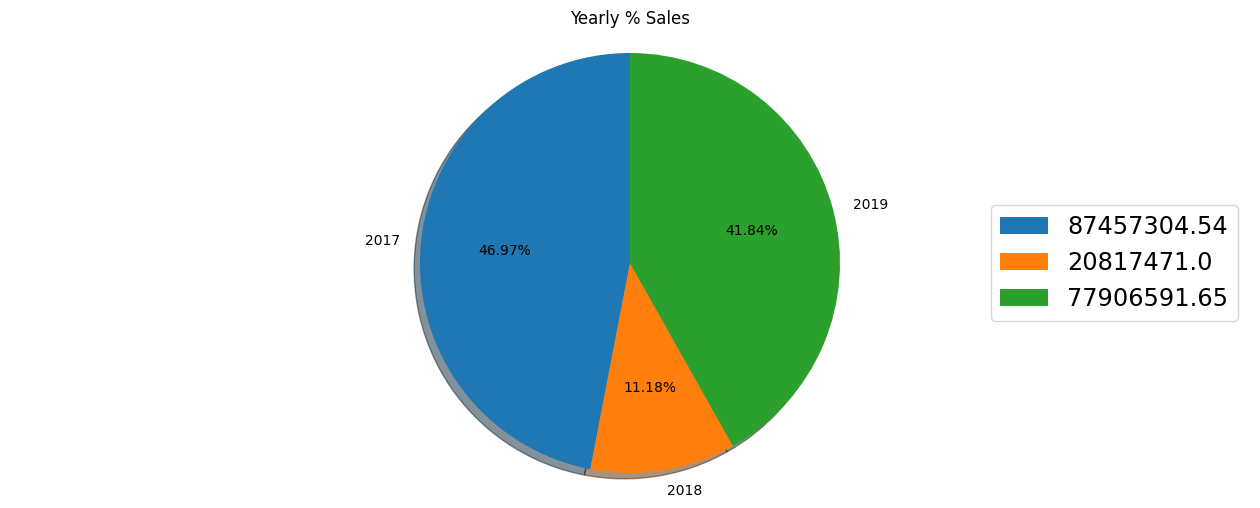

In [50]:
# plotting Piechart to know YoY Sales

plt.figure(figsize=(16,6))
plt.pie('Sales Amount', labels = 'Invoice Year', data = yearly_sales, autopct = '%1.2f%%', shadow = True, startangle = 90)
plt.axis('equal')
plt.title('Yearly % Sales')
plt.legend(round(yearly_sales['Sales Amount'],2), loc = 7, fontsize = 'xx-large')
plt.show()

Observation:

Year 2017 accounted for highest Sales (46.97%), followed by Year 2019 (41.84%) lastly Year 2018 (11.18%)

Text(0, 0.5, 'Count')

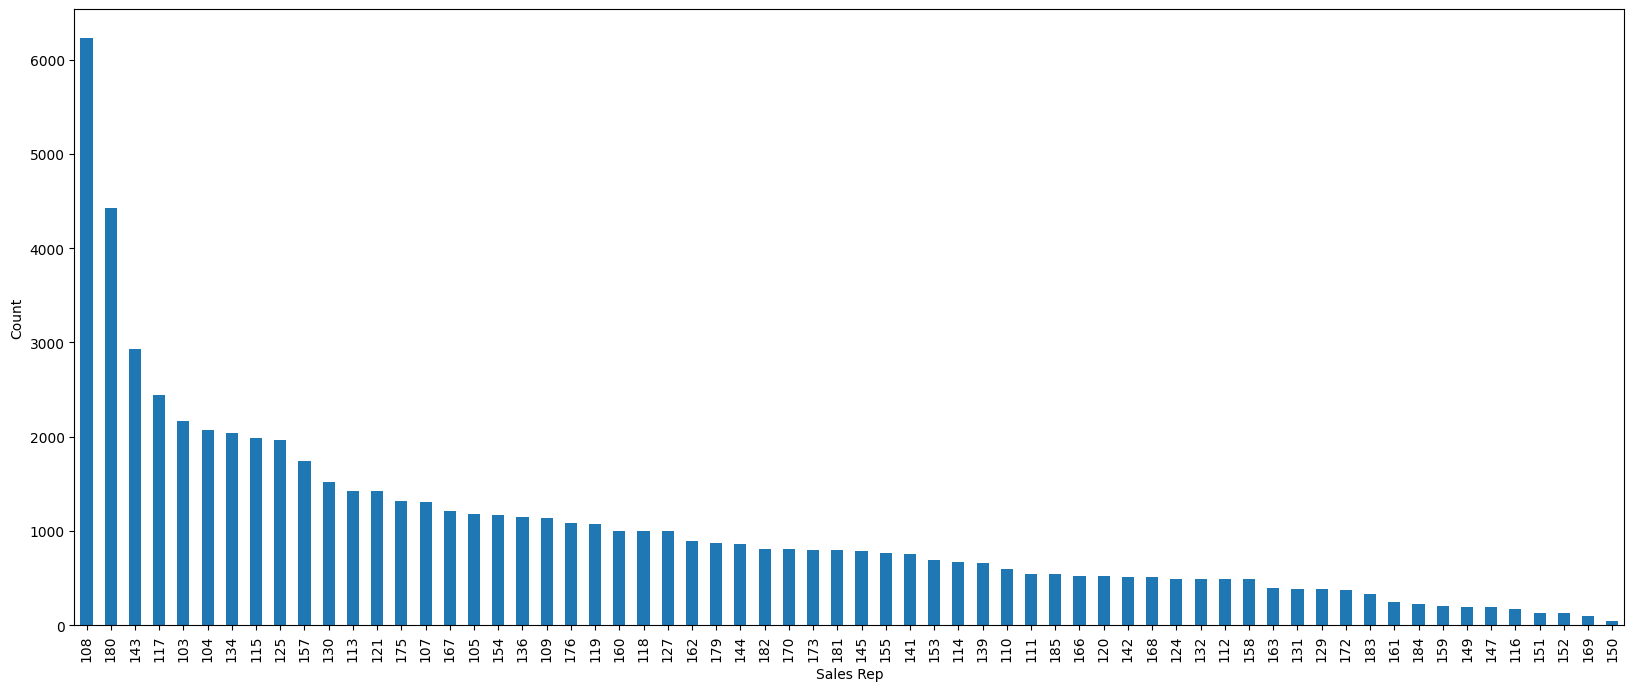

In [51]:
plt.figure(figsize=(20,8))
sales['Sales Rep'].value_counts().plot.bar()
plt.xlabel('Sales Rep')
plt.ylabel('Count')

Observation:

Sales Rep 108 was used the maximum times and Sales Rep 150 was used the minimum.

In [52]:
# yearly monthwise records

yearly_monthwise_sales = sales.groupby(['Invoice Year','Invoice Month']).sum().reset_index()
yearly_monthwise_sales.iloc[:,6:].describe()

,Sales Amount Based on List Price,Sales Cost Amount,Sales Margin Amount,Sales Price,Sales Quantity,Sales Rep,Invoice Quarter,Invoice Day
count,2.700000e+01,2.700000e+01,2.700000e+01,27.000000,27.000000,27.000000,27.000000,27.000000
mean,1.138197e+07,4.016002e+06,2.879604e+06,685915.941545,109007.222222,332258.740741,5837.111111,39061.370370
std,2.220965e+06,6.506092e+05,5.152791e+05,117490.201952,18095.115079,55396.534583,3360.496327,7380.842834
min,4.900167e+06,1.897292e+06,1.290189e+06,270807.438237,55192.000000,130314.000000,965.000000,20678.000000
25%,1.077866e+07,3.688586e+06,2.622197e+06,620357.646120,98729.000000,306638.500000,2599.500000,34253.000000
50%,1.152212e+07,4.092856e+06,2.882060e+06,696506.820154,111172.000000,339909.000000,5476.000000,40544.000000
75%,1.278649e+07,4.370919e+06,3.134162e+06,753245.775603,119393.000000,366618.000000,8332.500000,44712.500000
max,1.472000e+07,5.041842e+06,3.810222e+06,876228.847968,138019.000000,404709.000000,11576.000000,49487.000000


Text(1012.4490740740741, 0.5, 'Sales')

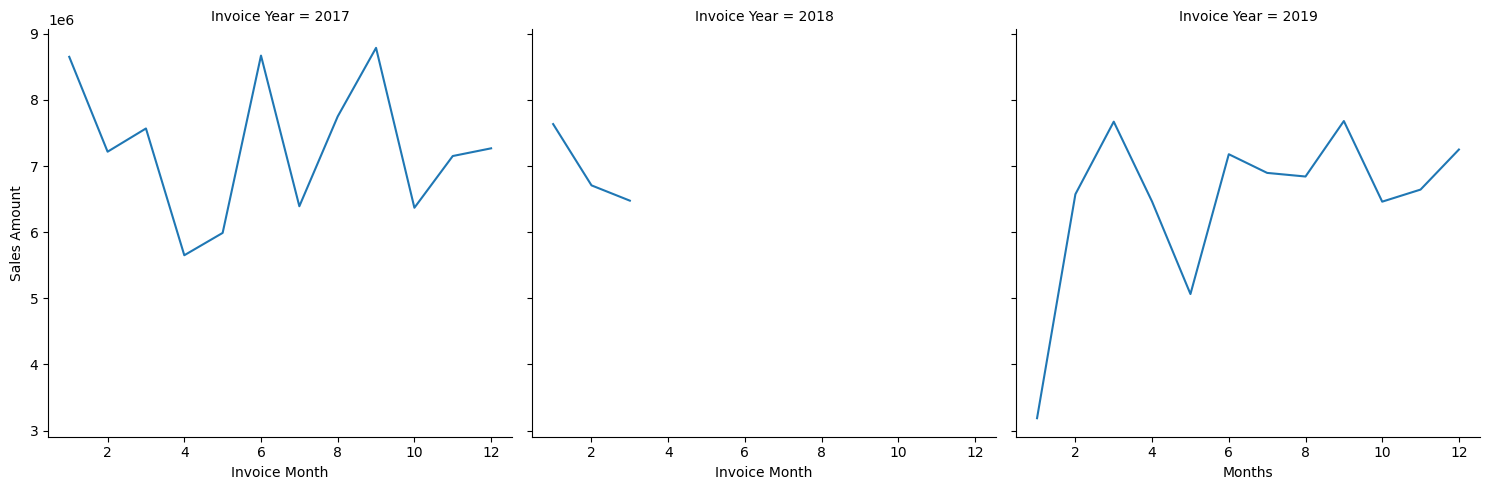

In [53]:
sns.relplot(x = 'Invoice Month', y = 'Sales Amount', data = yearly_monthwise_sales, height = 5, kind = 'line', aspect = 1, col = 'Invoice Year')
plt.xlabel('Months')
plt.ylabel('Sales')

<Axes: xlabel='Sales Amount', ylabel='Count'>

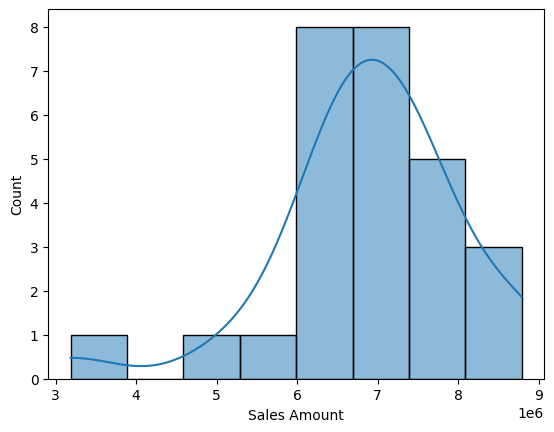

In [54]:
sns.histplot(yearly_monthwise_sales['Sales Amount'], kde = True)

In [55]:
# monthly records

monthly_sales = sales.groupby(['Invoice Year','Invoice Month', 'Invoice Day']).sum().reset_index()
monthly_sales.iloc[:,5:].describe()

,List Price,Sales Amount,Sales Amount Based on List Price,Sales Cost Amount,Sales Margin Amount,Sales Price,Sales Quantity,Sales Rep,Invoice Quarter
count,559.000000,5.590000e+02,5.590000e+02,559.000000,559.000000,559.000000,559.000000,559.000000,559.000000
mean,60107.716035,3.330615e+05,5.497554e+05,193975.037460,139086.442308,33130.108089,5265.107335,16048.275492,281.935599
std,31837.127941,2.302024e+05,3.889088e+05,136009.114595,97025.174636,17179.276121,4781.445858,8052.820326,213.036494
min,0.000000,5.433650e+03,0.000000e+00,0.000000,2349.360000,1063.117667,4.000000,345.000000,6.000000
25%,40370.544400,1.572531e+05,2.560595e+05,92237.325000,62655.095000,22084.687514,2106.500000,10063.000000,124.000000
50%,54665.030000,2.688299e+05,4.487250e+05,150428.990000,113446.860000,30440.440019,3118.000000,14666.000000,216.000000
75%,72573.307400,4.696801e+05,7.178838e+05,267013.720000,195474.320000,41211.201040,6577.000000,19652.500000,372.000000
max,231196.720800,1.379283e+06,2.408920e+06,760197.860000,619085.330000,128415.923388,23710.000000,55866.000000,1341.000000


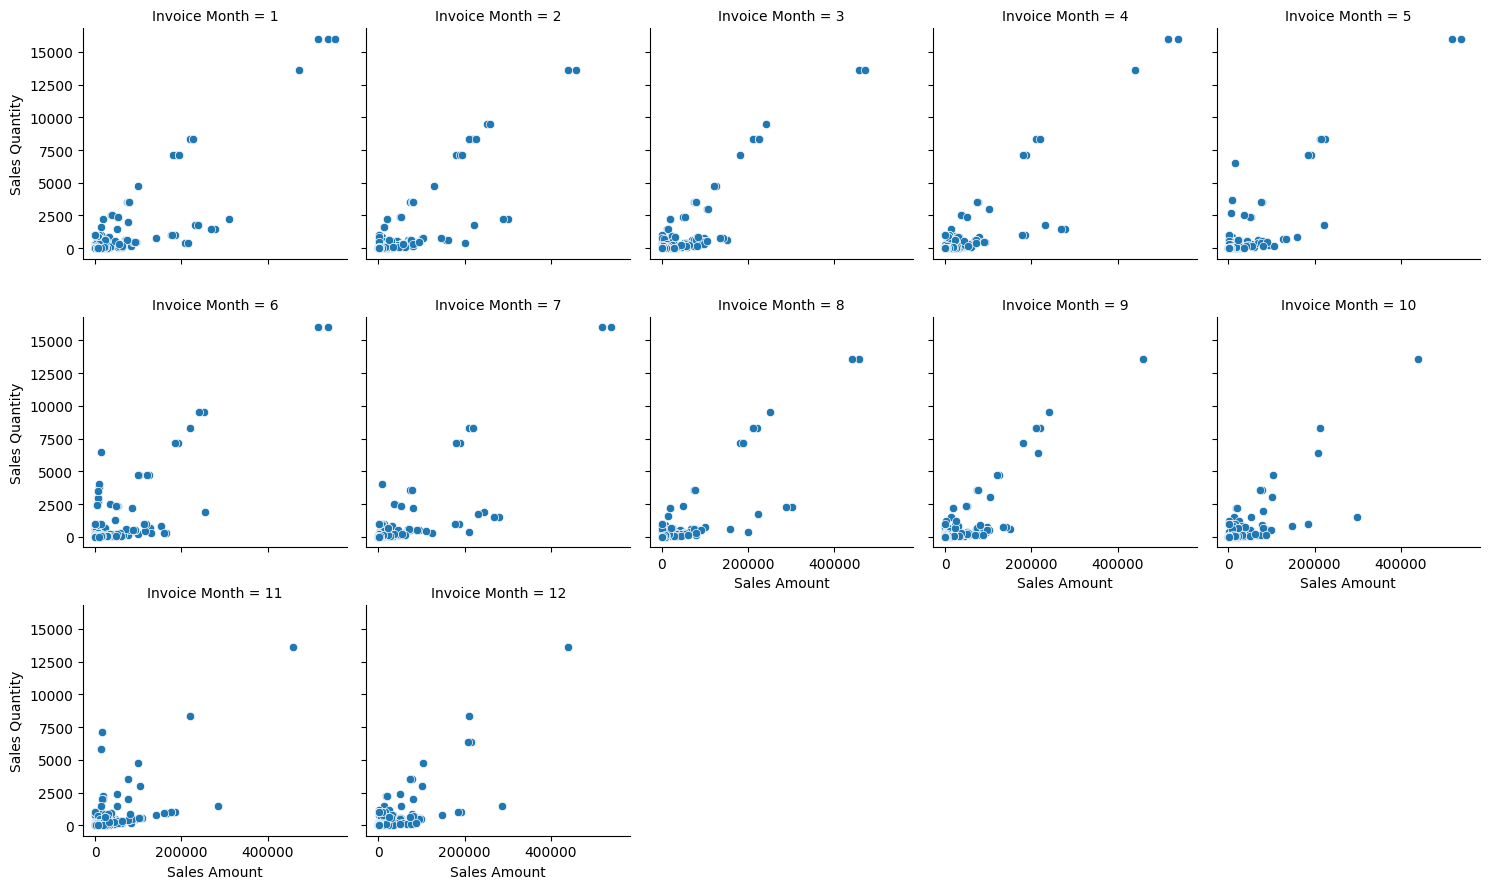

In [56]:
sns.relplot(y ='Sales Quantity', x = 'Sales Amount', data = sales, height = 3, aspect = 1, col = 'Invoice Month', col_wrap = 5, palette = 'muted')

,Invoice Year,Sales Margin Amount
0,2017,37419472.46
1,2018,9147547.74
2,2019,31182301.05


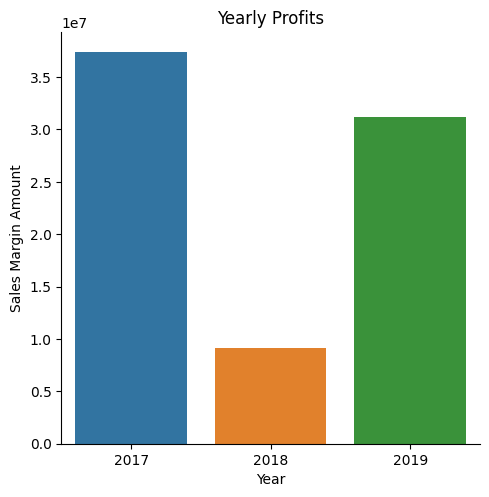

In [57]:
sns.catplot(y = 'Sales Margin Amount', x = 'Invoice Year', data = yearly_sales, kind = "bar")
plt.xlabel('Year')
plt.ylabel('Sales Margin Amount')
plt.title('Yearly Profits')
yearly_sales[['Invoice Year', 'Sales Margin Amount']]

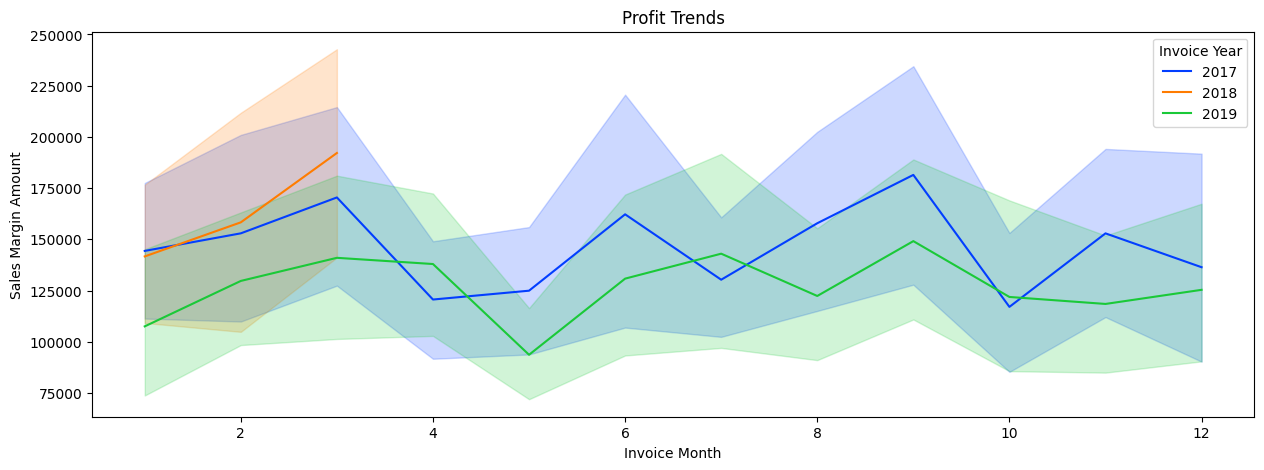

In [58]:
plt.figure(figsize = (15,5))
sns.lineplot(y ='Sales Margin Amount', x = 'Invoice Month',
             data = sales.groupby(['Invoice Date','Invoice Year','Invoice Month']).sum(), hue = 'Invoice Year', palette='bright')
plt.title('Profit Trends')
plt.show()

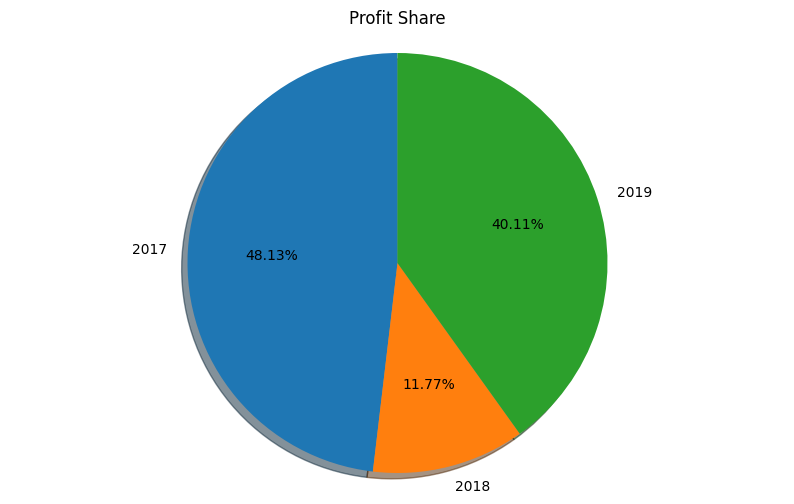

In [59]:
plt.figure(figsize=(10,6))
plt.pie('Sales Margin Amount', labels = 'Invoice Year', data = yearly_sales[['Invoice Year', 'Sales Margin Amount']],
        autopct='%1.2f%%',shadow=True,startangle=90)
plt.axis('equal')
plt.title('Profit Share')
plt.show()

In [60]:
Top10byCustKey17 = year_sales[year_sales['Invoice Year']==2017].groupby(['Invoice Year','CustKey']).sum()
Top10byCustKey17 = Top10byCustKey17.sort_values('Sales Margin Amount', ascending=False).reset_index().head(10)

,CustKey,Sales Margin Amount
0,10021485,5176926.16
1,10025024,3250809.87
2,10025052,1761731.21
3,10025919,1415771.68
4,10025241,1267256.40
5,10023023,870216.36
6,10020184,843138.90
7,10009606,835041.55
8,10012715,782863.50
9,10023715,729615.06


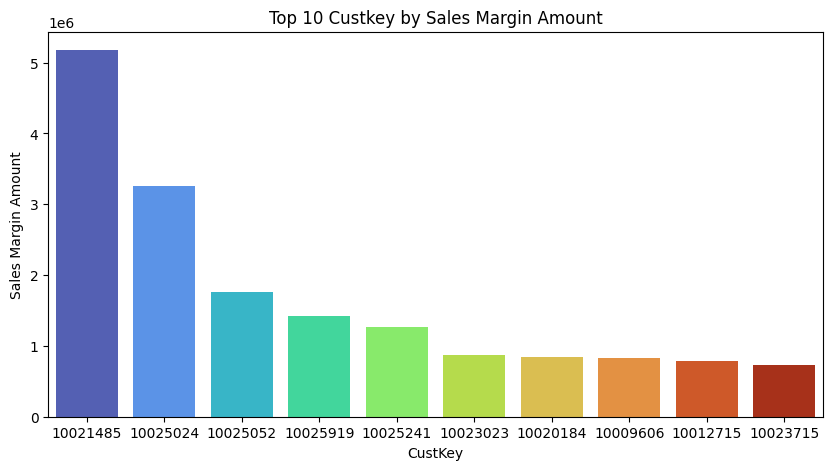

In [61]:
plt.figure(figsize=(10,5))
sns.barplot(x = 'CustKey', y = 'Sales Margin Amount', data = Top10byCustKey17, palette = 'turbo', order = Top10byCustKey17.CustKey)
plt.title('Top 10 Custkey by Sales Margin Amount')
Top10byCustKey17[['CustKey', 'Sales Margin Amount']]

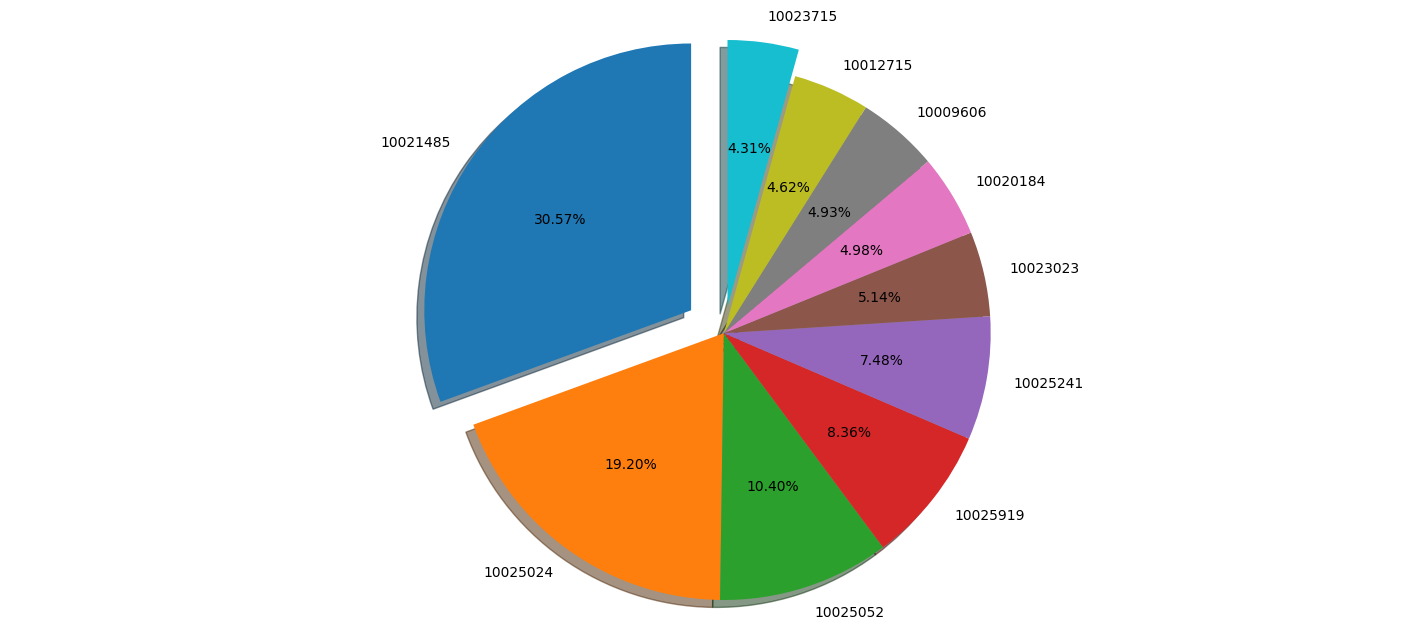

In [62]:
plt.figure(figsize=(18,8))
plt.pie('Sales Margin Amount',labels = 'CustKey', data = Top10byCustKey17,
        autopct = '%1.2f%%',shadow = True, startangle = 90, explode = (0.15, 0, 0, 0, 0, 0, 0, 0, 0, 0.1))
plt.axis('equal')
plt.show()

Observations:

Among the 10 CustKey that generated the most Sales Margin Amount, CustKey-10021485 contributed around 30.57% of the Sales Margin Amount in 2017.

In [63]:
Top10byCustKey18 = year_sales[year_sales['Invoice Year']==2018].groupby(['Invoice Year','CustKey']).sum()
Top10byCustKey18 = Top10byCustKey18.sort_values('Sales Margin Amount', ascending=False).reset_index().head(10)

,CustKey,Sales Margin Amount
0,10025039,1398188.29
1,10002154,1154085.14
2,10006919,509760.00
3,10025552,332110.69
4,10017638,233470.15
5,10019066,207997.56
6,10026299,195547.06
7,10023471,195034.39
8,10007183,162898.91
9,10010935,152253.65


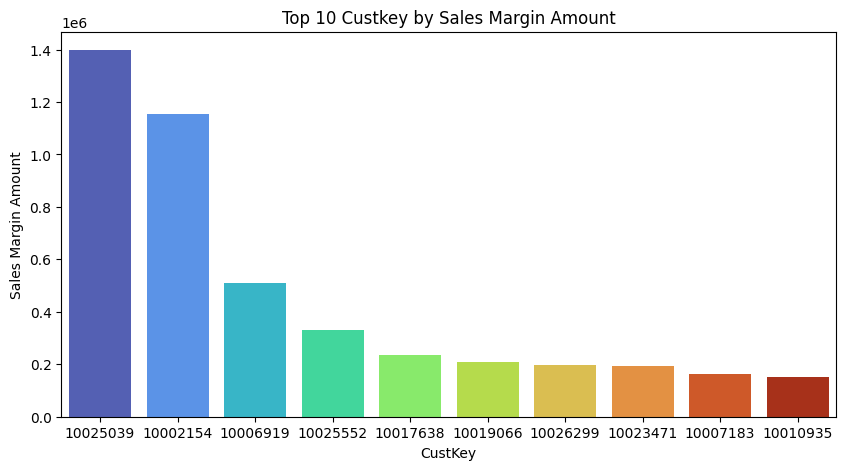

In [64]:
plt.figure(figsize=(10,5))
sns.barplot(x = 'CustKey', y = 'Sales Margin Amount', data = Top10byCustKey18, palette = 'turbo', order = Top10byCustKey18.CustKey)
plt.title('Top 10 Custkey by Sales Margin Amount')
Top10byCustKey18[['CustKey', 'Sales Margin Amount']]

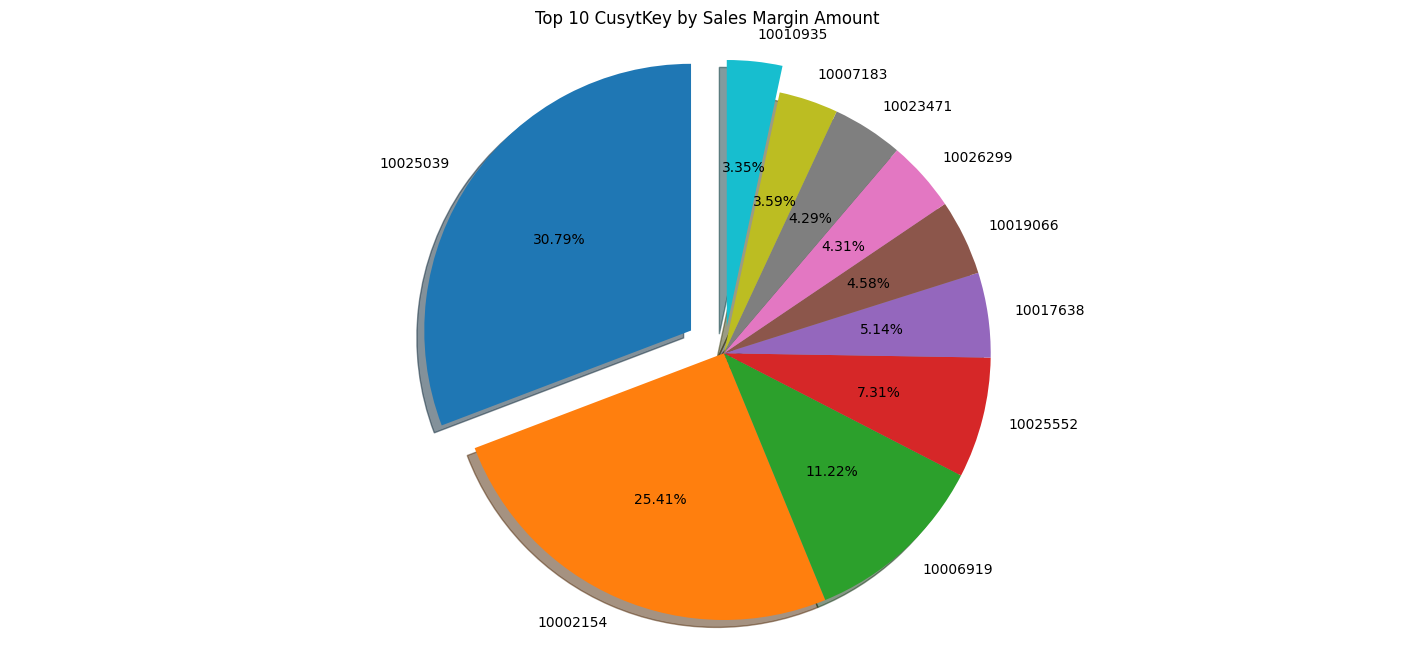

In [65]:
plt.figure(figsize=(18,8))
plt.pie('Sales Margin Amount',labels='CustKey',data = Top10byCustKey18, autopct='%1.2f%%',
        shadow = True, startangle = 90, explode = (0.15, 0, 0, 0, 0, 0, 0, 0, 0, 0.1))
plt.axis('equal')
plt.title('Top 10 CusytKey by Sales Margin Amount')
plt.show()

Observations:

Among the 10 CustKey that generated the most Sales Margin Amount, CustKey-10025039 contributed around 30.79% of the Sales Margin Amount in 2018.

In [66]:
Top10byCustKey19 = year_sales[year_sales['Invoice Year']==2019].groupby(['Invoice Year','CustKey']).sum()
Top10byCustKey19 = Top10byCustKey19.sort_values('Sales Margin Amount', ascending=False).reset_index().head(10)

,CustKey,Sales Margin Amount
0,10009676,4473954.12
1,10021300,2840289.66
2,10025737,1544679.20
3,10019194,1221320.93
4,10025353,1114700.90
5,10025571,798919.82
6,10026606,712503.86
7,10012226,702720.45
8,10016548,683579.49
9,10004245,619735.78


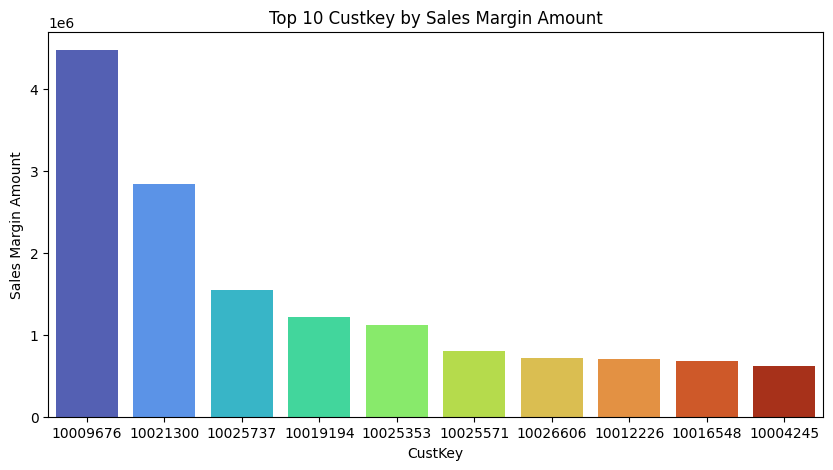

In [67]:
plt.figure(figsize=(10,5))
sns.barplot(x = 'CustKey', y = 'Sales Margin Amount', data = Top10byCustKey19, palette = 'turbo', order = Top10byCustKey19.CustKey)
plt.title('Top 10 Custkey by Sales Margin Amount')
Top10byCustKey19[['CustKey', 'Sales Margin Amount']]

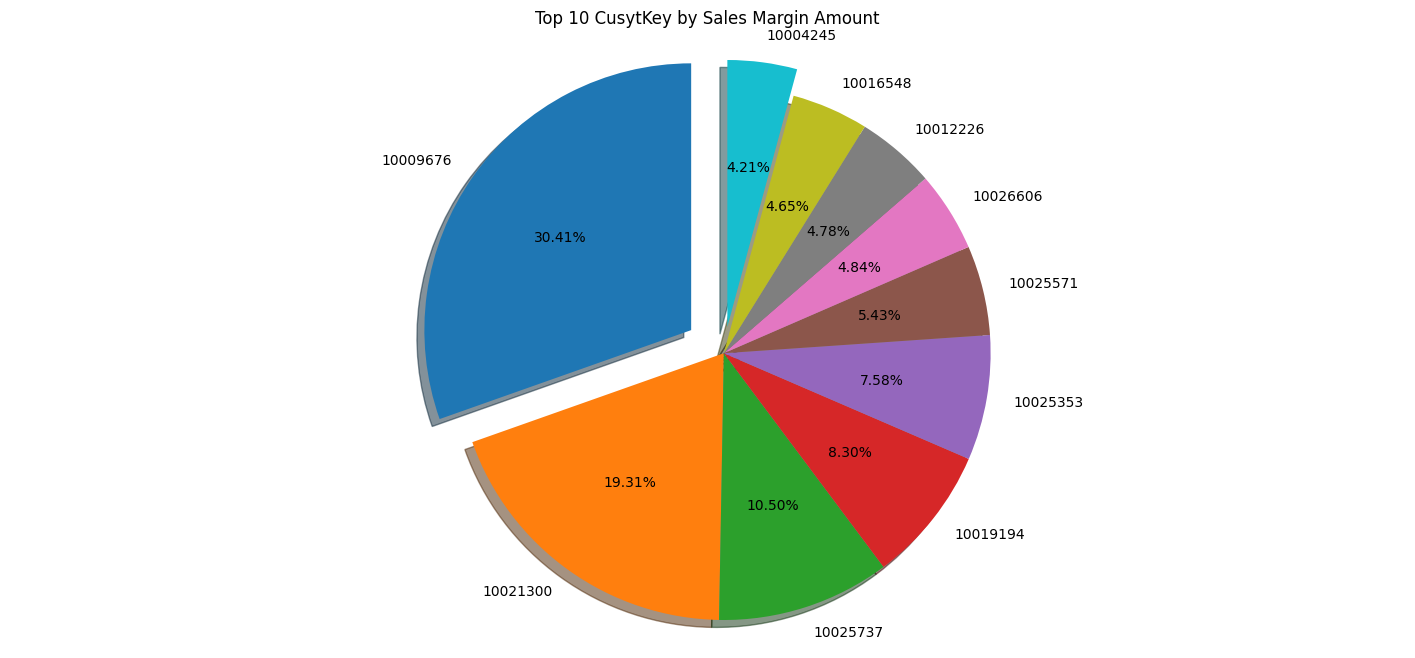

In [68]:
plt.figure(figsize=(18,8))
plt.pie('Sales Margin Amount',labels='CustKey',data = Top10byCustKey19, autopct='%1.2f%%',
        shadow = True, startangle = 90, explode = (0.15, 0, 0, 0, 0, 0, 0, 0, 0, 0.1))
plt.axis('equal')
plt.title('Top 10 CusytKey by Sales Margin Amount')
plt.show()

Observations:

Among the 10 CustKey that generated the most Sales Margin Amount, CustKey-10009676 contributed around 30.41% of the Sales Margin Amount in 2019.